In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data = pd.read_excel('hotel_reviews (1).xlsx')

In [3]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
data.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [6]:
data.shape

(20491, 2)

In [13]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [14]:

corr=data.corr()

corr

C:\Users\HP\AppData\Local\Temp\ipykernel_18140\1345314459.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,Rating
Rating,1.0


In [15]:
data['Rating'].value_counts()


5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [7]:
data_neg = data.loc[data["Rating"]<3]
data_neg = data_neg.reset_index(drop = True)

In [8]:
data_five = data.loc[data['Rating'] == 5]
data_five = data_five.reset_index(drop = True)

In [9]:
data_pos = data_five.loc[:len(data_neg)]

In [10]:
data_all = pd.concat([data_neg,data_pos], axis = 0)
data_all = data_all.reset_index(drop = True)

In [11]:
len(data_all)

6429

In [12]:
# Tokenize the 'reviews' column and create a new column 'tokenized_reviews'
data['tokenized_Review'] = data['Review'].apply(lambda x: word_tokenize(str(x)))

In [13]:
# Display the first few rows of the DataFrame including the new column
print(data[['Review', 'tokenized_Review']])


                                                  Review  \
0      nice hotel expensive parking got good deal sta...   
1      ok nothing special charge diamond member hilto...   
2      nice rooms not 4* experience hotel monaco seat...   
3      unique, great stay, wonderful time hotel monac...   
4      great stay great stay, went seahawk game aweso...   
...                                                  ...   
20486  best kept secret 3rd time staying charm, not 5...   
20487  great location price view hotel great quick pl...   
20488  ok just looks nice modern outside, desk staff ...   
20489  hotel theft ruined vacation hotel opened sept ...   
20490  people talking, ca n't believe excellent ratin...   

                                        tokenized_Review  
0      [nice, hotel, expensive, parking, got, good, d...  
1      [ok, nothing, special, charge, diamond, member...  
2      [nice, rooms, not, 4, *, experience, hotel, mo...  
3      [unique, ,, great, stay, ,, wonderfu

In [14]:
from nltk.corpus import stopwords
corpus = []
for i in range(0, 20491):  # 20491 reviews rows to clean
    Review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    Review = Review.lower()  # Convert all cases to lower cases
    Review = Review.split( )  # Split to array (default delimiter is "")
    ps = PorterStemmer()
    Review = [ps.stem(word) for word in Review if not word in set(stopwords.words('english'))]
    Review = ' '.join(Review)
    corpus.append(Review)

In [ ]:
corpus

In [34]:
print(corpus[:5])

['nice hotel expens park got good deal stay hotel anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night', 'ok noth special charg diamond member hilton decid chain shot th anniversari seattl start book suit paid extra websit descript suit bedroom bathroom standard hotel room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard 

In [ ]:
data['processed_Review'] = corpus
print(data[['Review', 'processed_Review', 'Rating']])

**Stemming & Lemmatization**

In [ ]:
#stemming and lemmatization
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

data['stemming_result'] = data['Review'].apply(lambda x: ' '.join([ps.stem(word) for word in x.lower().split() if word not in set(stopwords.words('english'))]))
data['lemmatization_result'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.lower().split() if word not in set(stopwords.words('english'))]))

print(data[['Review', 'stemming_result', 'lemmatization_result']])

**Bag Of Words**

In [ ]:
# Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Review'])

bow_data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
final_data = pd.concat([data[['Review', 'Rating']], bow_data], axis=1)
print(final_data)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x= tf.fit_transform(corpus)

In [ ]:
x.toarray()

In [ ]:
tf = TfidfVectorizer(max_features=5000)  # Adjust the number based on your available memory


In [ ]:
x_sparse = tf.fit_transform(corpus)


In [ ]:
tfidf_array = x.toarray()

**WordCloud**

In [ ]:
# Word Cloud
corpus = data['processed_Review'].values
text = ' '.join(corpus)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



**NER**

In [ ]:
!pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
from spacy import displacy
import pandas as pd

In [ ]:
import pandas as pd

# Specify the file path
file_path = "hotel_reviews (1).xlsx"

try:
    # Try to read the Excel file
    data = pd.read_excel(file_path)
except Exception as e:
    # Handle the exception, print an error message, or take appropriate action
    print(f"An error occurred: {e}")
    # You can also choose to assign an empty DataFrame or None to 'data' in case of an error
    data = pd.DataFrame()

# Now you can check if 'data' is empty or contains your DataFrame
if not data.empty:
    print(data.head())
else:
    print("Data is empty or an error occurred during reading.")


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
nlp.pipe_names

In [ ]:
#NER 
doc = nlp("nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night")

In [ ]:
doc.ents     #Display all entities

In [ ]:
for i in doc.ents:
    print(i, '|' , i.label_)

In [ ]:
#Spacy library is not 100% precise

In [ ]:
#to display graphical representation for tags
displacy.render(doc,style='ent',jupyter=True)

In [ ]:
for index, row in data.iterrows():
    review_text = row['Review']
    doc = nlp(review_text)
    # Display named entities for each review
    print(f"Entities for Review {index + 1}:")
    for ent in doc.ents:
        print(ent.text, '|', ent.label_)

    # Display graphical representation for named entities
    displacy.render(doc, style='ent', jupyter=True)

**Sentiment**

In [6]:
!pip install TextBlob

                                              0.0/636.8 kB ? eta -:--:--
     ------------                           204.8/636.8 kB 4.1 MB/s eta 0:00:01
     ----------------------------           471.0/636.8 kB 5.9 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 5.7 MB/s eta 0:00:00


import pandas as pd
from textblob import TextBlob
data = pd.read_excel("hotel_reviews (1).xlsx")

# Function to generate sentiment labels using TextBlob and ratings
def get_sentiment(review, rating):
    polarity = TextBlob(review).sentiment.polarity
    if rating <= 3:
        if polarity >= 0:
            return 'Negative'
        else:
            return 'Positive'
    else:
        if polarity >= 0:
            return 'Positive'
        else:
            return 'Negative'

# Apply sentiment analysis to the 'Review' column
data['Sentiment'] = data.apply(lambda x: get_sentiment(x['Review'], x['Rating']), axis=1)

# Print the first few rows to verify
print(data.head(10))


print(data.tail(10))

In [17]:
import numpy as np
data_all["Sentiment"] = np.where(data_all["Rating"] == 5, "Positive" , "Negative")

In [18]:
data_all = data_all.sample(frac = 1)
data_all = data_all.reset_index(drop = True)

In [19]:
data_all.head()

,Review,Rating,Sentiment
0,"conveniently located, feel bit mean giving 2 r...",2,Negative
1,"not 5 star, husband stayed paradisus 5 days 4 ...",2,Negative
2,"hated checked early, travel extensively time d...",1,Negative
3,prieto tours joke theres no way rate hotel ave...,1,Negative
4,"shock, say..very disapointed, wife traveled pu...",1,Negative


In [20]:
data_all.tail()

,Review,Rating,Sentiment
6424,"hated group trip 11, think rooms disgusting be...",2,Negative
6425,suberb boutiuqe luxury hotel 41 hotel delightf...,5,Positive
6426,"worst trip, place terrible, purto sucko, place...",1,Negative
6427,"cheap not worth bedbugs cheap, definitely hear...",1,Negative
6428,"great city hilton hilton simply wonderful, loc...",5,Positive


**Split The Data**

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_all.Review, data_all.Sentiment)

In [22]:
v = CountVectorizer()
x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

**Classification Model**


**Support Vector Machine**

In [42]:
from sklearn import svm
SVM =svm.SVC(kernel = "linear")
SVM.fit(x_train_vec, y_train)

SVC(kernel='linear')

In [43]:
SVM.score(x_test_vec, y_test)

0.9508706467661692

In [52]:
from sklearn.metrics import f1_score
f1_svm = f1_score(y_test,SVM.predict(x_test_vec), average = None)

In [54]:
review1 = ["unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathrobes feel like rock stars, nice did n't look like sterile chain hotel hotel personality excellent stay."]
review1_vec = v.transform(review1)
SVM.predict(review1_vec)

array(['Positive'], dtype=object)

In [55]:
review1 = ["stay did not care hotel, expecting cozy trendy room sadly disappointed tiny run-down room strange odor, bed practically floor level afraid head pillow, no warmth room just bare necessities, feel better place money not mention 30.00 mandatory valet parking,  "]
review1_vec = v.transform(review1)
SVM.predict(review1_vec)

array(['Negative'], dtype=object)

**Naives Bayes**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Build the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_vec, y_train)

# Predict sentiment labels on the testing set
y_pred = nb_classifier.predict(x_test_vec)

In [33]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9558457711442786


In [34]:
review2 = ["poor value stayed monaco seattle july, nice hotel priced 100- 150 night not, hotel takes beating quotient, experience simply average, nothing exceptional paying 300+ n't ca n't terribly disappointed, wife stayed nicest suites 200/night felt like overpaying, best advice shop, quality-wise league average marriott nice best western,  "]
review2_vec = v.transform(review2)
nb_classifier.predict(review2_vec)

array(['Negative'], dtype='<U8')

**Random Forest**

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_vec, y_train)
y_pred = rf_classifier.predict(x_test_vec)

In [84]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9432348367029549


In [31]:
review3 = ["poor value stayed monaco seattle july, nice hotel priced 100- 150 night not, hotel takes beating quotient, experience simply average, nothing exceptional paying 300+ n't ca n't terribly disappointed, wife stayed nicest suites 200/night felt like overpaying, best advice shop, quality-wise league average marriott nice best western,  "]
review3_vec = v.transform(review3)
nb_classifier.predict(review3_vec)

NameError: name 'nb_classifier' is not defined

**Logistics Regression**

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(data_all['Review'], data_all['Sentiment'], test_size=0.2, random_state=50)

logreg_model = LogisticRegression()
logreg_model.fit(x_train_vec, y_train)

y_pred = logreg_model.predict(x_test_vec)

In [86]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9572317262830482


**Gradient Boosting**

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train_vec, y_train)

y_pred = gb_classifier.predict(x_test_vec)

In [88]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9144634525660964


**KNN**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(x_train_vec, y_train)

# Predict sentiment labels on the testing set
y_pred = knn_classifier.predict(x_test_vec)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7885572139303483


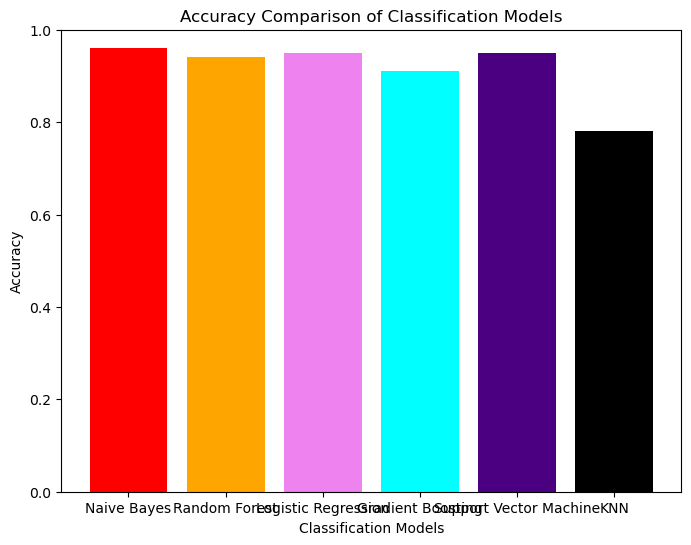

In [30]:
accuracy_nb = 0.96 
accuracy_rf = 0.94
accuracy_logreg = 0.95
accuracy_gb=0.91
accuracy_SVM=0.95
accuracy_knn = 0.78

model_names = ['Naive Bayes', 'Random Forest','Logistic Regression','Gradient Boosting','Support Vector Machine','KNN']
accuracies = [accuracy_nb, accuracy_rf , accuracy_logreg, accuracy_gb, accuracy_SVM, accuracy_knn]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['Red','Orange','Violet', 'cyan', 'Indigo', 'black'])
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.ylim(0, 1) 
plt.show()
